In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [5]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
)

training_set = train_datagen.flow_from_directory(
    'data/train',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary',
)

Found 13953 images belonging to 107 classes.


In [7]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
)

testing_set = test_datagen.flow_from_directory(
    'data/valid',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary',
)

Found 1165 images belonging to 107 classes.


In [9]:
images, labels = next(training_set)
labels

array([ 69.,  89.,  80.,  44.,  24.,  83.,  87.,  84.,  15.,  73.,  48.,
       103.,  24.,  60.,  21.,   7.,  19.,   0.,  96.,  92.,  28., 100.,
        96.,  30.,   3.,  88.,  48.,  20.,  94.,  92.,   6.,  96.],
      dtype=float32)

In [11]:
model=Sequential()

model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(107,activation='softmax'))

C:\Users\SABAREESH\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 107)                 │          27,499 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 763,819 (2.91 MB)

 Trainable params: 763,659 (2.91 MB)

 Non-trainable params: 160 (640.00 B)

In [15]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
history=model.fit(training_set,epochs=30,validation_data=testing_set)

C:\Users\SABAREESH\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 60s 131ms/step - accuracy: 0.0198 - loss: 4.9275 - val_accuracy: 0.0670 - val_loss: 4.3503
Epoch 2/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 55s 126ms/step - accuracy: 0.0686 - loss: 4.2510 - val_accuracy: 0.0850 - val_loss: 4.2373
Epoch 3/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 50s 114ms/step - accuracy: 0.1399 - loss: 3.6999 - val_accuracy: 0.2112 - val_loss: 3.2233
Epoch 4/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 50s 115ms/step - accuracy: 0.2183 - loss: 3.1937 - val_accuracy: 0.2704 - val_loss: 3.0165
Epoch 5/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 47s 108ms/step - accuracy: 0.2614 - loss: 2.9018 - val_accuracy: 0.3021 - val_loss: 2.9427
Epoch 6/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 50s 114ms/step - accuracy: 0.3021 - loss: 2.6567 - val_accuracy: 0.3416 - val_loss: 2.7957
Epoch 7/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 50s 113ms/step - accuracy: 0.3505 - loss: 2.4326 - val_accuracy: 0.3262 - val_loss: 2.7195
Epoch 8/30
437/437 ━━━━━━━━━━━━━━━━━━━━ 57s 131ms/step - accuracy: 0.3894 - loss: 2

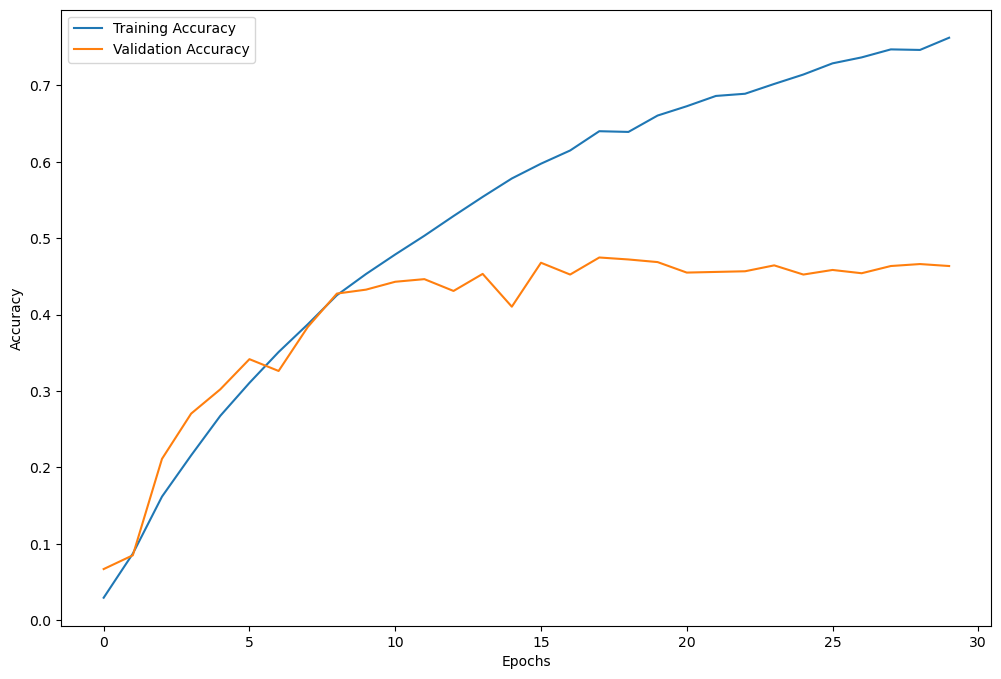

In [19]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
model.save_weights('yoga-model.weights.h5')
